## Импорт бибилотек 

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns 
from matplotlib import pyplot as plt
import scipy.stats as stats
import datetime as dt

## Знакомство с данными 

Сохраню данные в соответствующие переменные и после буду анализировать их. 

In [2]:
data = pd.read_csv('~hypothesis.csv')
orders = pd.read_csv('~orders.csv')
visitors = pd.read_csv('~visitors.csv')

Для оценки качества полученных данных я воспользуюсь несколькими методами:

1. `.info()` для вывода краткой общей информации о таблице;
2. `.columns` для проверки корректности стилистики названий столбцов;
3.  `duplicated().sum()` для проверки на дубликаты.

Свою работы я поделю на 2 части: 
1. Сначала займусь приоритизацией гипотез. Познакомлюсь с данными датасета гипотез и, собственно, сделаю приоритизацию. 
2. После проанализию A/B тест.

## Приоритизация гипотез

### Проверка данных датафрейма

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [4]:
data.columns = data.columns.str.lower()
pd.set_option("max_colwidth", 100)
data

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средни...",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конве...",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [5]:
data.duplicated().sum()

0

1. Дублей нет.
2. Пропусков нет.
3. Перевел заголовки датафрейма в нижний регистр. 
4. С данными датафрейма с гипотезами все хорошо. Перейдем к приоритизации. 

### Приоритизация гипотез
Взгляну на данные.

Сначала приоритизируем методом ICE. После перейдем к фрейворку RICE. Выделю полученные различия и опишу причины их появления.

In [6]:
display(data)

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средни...",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конве...",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


**ICE**

Формула ICE: 
$$ICE = \frac{Impact * Confidence}{Efforts}$$

In [7]:
data['ICE'] = data['impact'] * data['confidence'] / data['efforts']
data = data.sort_values(by='ICE', ascending=False).reset_index()
data

,index,hypothesis,reach,impact,confidence,efforts,ICE
0,8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.200000
1,0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.333333
2,7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.200000
3,6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конве...",5,3,8,3,8.000000
4,2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средни...",8,3,7,3,7.000000
5,1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.000000
6,5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.333333
7,3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.125000
8,4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.000000


**RICE**

Формула RICE:

$$RICE = \frac{Rearch * Impact * Confidence}{Efforts}$$

In [8]:
data['RICE'] = data['reach'] * data['impact'] * data['confidence'] / data['efforts']
pd.set_option("max_colwidth", 100)
data.sort_values(by='RICE', ascending=False).reset_index()
data

,index,hypothesis,reach,impact,confidence,efforts,ICE,RICE
0,8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.200000,16.2
1,0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.333333,40.0
2,7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.200000,112.0
3,6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конве...",5,3,8,3,8.000000,40.0
4,2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средни...",8,3,7,3,7.000000,56.0
5,1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.000000,4.0
6,5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.333333,4.0
7,3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.125000,9.0
8,4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.000000,3.0


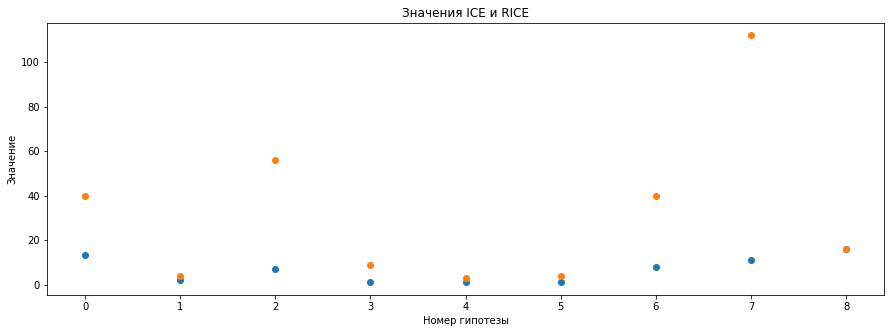

In [9]:
x_values = pd.Series(range(0,len(data['ICE'])))
fig = plt.figure(figsize=(15,5))
plt.scatter(data['index'], data['ICE'])
plt.scatter(data['index'], data['RICE'])
plt.xlabel('Номер гипотезы')
plt.ylabel('Значение')
plt.title('Значения ICE и RICE')
plt.show()

### Выводы после приоритизации гипотез

В рамках проведения приоритизации гипотез методом `ICE` мы видим, что наиболее перспективной является 9-я гипотеза "Запустить акцию, дающую скидку на товар в день рождения", поскольку именно у этой гипотизы наилучшее соотношение значения влияния (насколько сильно) изменения на пользователей, уверенности в этом и необходимых трудозатрат на реализацию изменения. 

В тройке лидеров также гипотеза о добавлении двух новых каналов привлечения трафика и добавлении формы подписки на основные страницы, чтобы собрать базу клиентов для email-рассылок. 

При применении модификации `RICE` мы видим существенное изменение в приоритизации гипотез. Так, лидер метода `ICE` уже только на 5-м месте. В первую же тройку вошли 8-я ("Добавить форму подписки на все основные страницы сайта, чтобы собрать базу клиентов для email-рассылок."), 3-я ("Добавить блоки рекомендация товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа") и 1-я ("Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей"). 

Произошло это из-за того, что метод `RICE` в отличие от `ICE` учитывает еще один показатель - Reach (скольких пользователей затронет изменение, которое вы хотите внести). И в ходе анализа мы выявили, что при лучшем соотношении значения влияния внесенных изменений на пользователей, уверенности в этом и необходимых трудозатрат на реализацию изменений 9-я гипотеза (лидер метода `ICE`) охватывает значительно меньше аудитории, чем 4 гипотезы, которые выше в рейтинге. Это, собственно, и служит причиной полученных изменений, поскольку охват как показатель для внедрения изменений критичен. 

## Анализ А/B теста

1. В данном блоке своей работы я также сначала взгяну на полученным данные. 
2. Использую методы, описанные ниже для знакомства с датафреймами.
3. Сделаю предобработку, если потребуется.
4. После перейду к анализу.

Я понимаю, что пункты 1 и 2 в моей работе уже повторяются, поскольку все знакомство и предобработку можно было сделать в одном блоке, но мне удобнее разделить работу по смысловым задачам таким образом. 

Методы для ознакомления с данными: 
1. `.info()` для вывода краткой общей информации о таблице;
2. `.columns` для проверки корректности стилистики названий столбцов;
3.  `duplicated().sum()` для проверки на дубликаты.

### Знакомство с полученным датафреймами

In [10]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [11]:
orders.columns

Index(['transactionId', 'visitorId', 'date', 'revenue', 'group'], dtype='object')

In [12]:
orders.duplicated().sum()

0

In [13]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [14]:
visitors.columns

Index(['date', 'group', 'visitors'], dtype='object')

In [15]:
visitors.duplicated().sum()

0

### Выводы по знакомству с полученным данными 

1. В обоих датафреймах нет пропусков.
2. В обоих датафреймах нет явных дубликатов.
3. Стоит добавить "змеиный регистр" в заголовки датафрейма с заказами (можно, наверно, этого и не делать)
4. Приведу также формат данных к нужному в столбцах с датами. 

### Предобработка данных 

Она займет совсем немного времени.

In [16]:
orders = orders.rename(columns={'transactionId' : 'transaction_id', 'visitorId' : 'visitor_id'})
orders.head()

,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [17]:
orders['date'] = orders['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  1197 non-null   int64         
 1   visitor_id      1197 non-null   int64         
 2   date            1197 non-null   datetime64[ns]
 3   revenue         1197 non-null   int64         
 4   group           1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


In [18]:
visitors['date'] = visitors['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


Закончили с предобработкой данных. В данном блоке делать больше нечего. Перейдем непосредственно к анализу и интерпретации результатов. 

**Проверка кол-ва пользователей в выборках**

In [19]:
print('Кол-во пользователей, попавших в выборку A:', orders[orders['group'] == 'A']['visitor_id'].count())
print('Кол-во пользователей, попавших в выборку B:', orders[orders['group'] == 'B']['visitor_id'].count())

Кол-во пользователей, попавших в выборку A: 557
Кол-во пользователей, попавших в выборку B: 640


Видим, что по кол-ву выборки немного отличаются друг от друга (46,5% и 53,5%). В целом, это не критично.

Также посмотрю, есть ли у нас пользователи, которые попали в обе выборки.

In [20]:
orders.groupby(by='visitor_id').agg({'group' : 'nunique'}).query('group > 1').shape[0]

58

Видим, что пересечений по пользователям в двух группах 58.Удалять, наверно, их не стоит, так как мы сильно исказим наш тест. 

### Подготовка данных к построению графиков

У нас пока что нет кумулятивных данных по нашим выборкам. Получим их. Для этого создадим массив уникальных пар значений дат и групп теста, чтобы потом собрать агрегированные данные по датам о заказах.

In [21]:
datesGroups = orders[['date','group']].drop_duplicates() 

Аггрегируем данные для датафрейма `orders`. Найдем максимальную дату, число уникальных ID заказов и пользователей и подсчитаем сумму средних чеков. Сохраню данные в датафрейм `ordersAggregated`.

In [22]:
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]\
.agg({'date' : 'max', 'group' : 'max', 'transaction_id' : 'nunique', 'visitor_id' : 'nunique', 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])
ordersAggregated.head()

,date,group,transaction_id,visitor_id,revenue
55,2019-08-01,A,24,20,148579
66,2019-08-01,B,21,20,101217
175,2019-08-02,A,44,38,242401
173,2019-08-02,B,45,43,266748
291,2019-08-03,A,68,62,354874


То же самое делаем и для датафрейма `visitors`.

In [23]:
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group']) 
visitorsAggregated.head()

,date,group,visitors
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845


Наконец, объединим 2 получившихся датафрейма в один, чтобы было удобнее дальше работать с ним (и только с ним одним). Переменную назову `cumulativeData`.

In [24]:
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

In [25]:
cumulativeData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62 entries, 0 to 61
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   orders    62 non-null     int64         
 3   buyers    62 non-null     int64         
 4   revenue   62 non-null     int64         
 5   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 3.4+ KB


**Промежуточный вывод**

Итак. Мы получили один датафрейм, которые включает в себя данные 2-х таблиц, рассмотренных ранее, а также включается в себя кумулятивные данные по выручке и заказам. Также, в нашем датафрейме есть деление на группы A и B, что позволяет нам дальше легко построить необходимые графики кумулятивной выручки по группам. 

### График кумулятивной выручки по группам

1. Сначало расчитаем кумулятивные данные по каждой группе.
2. После построим графики данных.
3. Дальше напишу выводы по полученным результатам. 

Для построения графика разобъем наш датафрейм по группам и построим plot. 

In [26]:
cumulativeRevenueA = cumulativeData[cumulativeData['group'] == 'A'][['date','revenue', 'orders']]
cumulativeRevenueB = cumulativeData[cumulativeData['group'] == 'B'][['date','revenue', 'orders']]

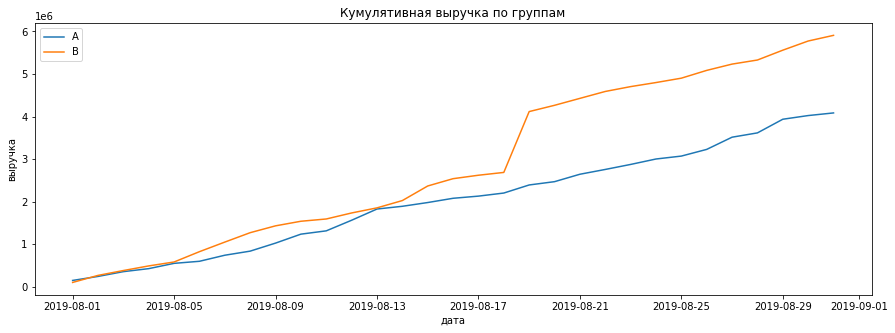

In [27]:
fig = plt.figure(figsize=(15,5))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.legend()
plt.xlabel('дата')
plt.ylabel('выручка')
plt.title('Кумулятивная выручка по группам')
plt.show()

### Выводы по графику кумулятивной выручки по группам


1. Выручка в группе `A` растет равномерно в течение времени. 
2. Выручка в группе `B` имеет резкий скачок 17 августа 2019 года. На графике отчетливо виден этот скачок. Явный всплеск заказов в эту дату. Второй возможной причиной такого скачка может быть появление одного или нескольких покупателей, сделавших большое кол-во заказов в этот день. 

Рассмотрим также график по группам средних чеков.

### График кумулятивного среднего чека по группам

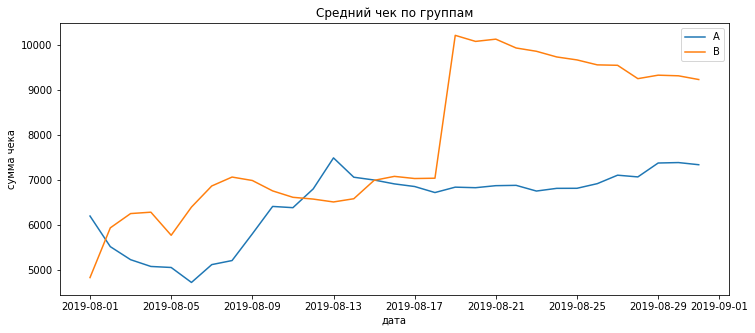

In [28]:
fig = plt.figure(figsize=(12,5))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.xlabel('дата')
plt.ylabel('сумма чека')
plt.title('Средний чек по группам')
plt.legend() 
plt.show()

### Выводы по графику среднего чека по группам

1. Показатель среднего чека ведет себя неравномерно в течение времени для обоих групп. 
2. Стабильный рост в течение нескольких дней для группы `A`, начиная с 5 августа 2019 года. 
3. Резкий скачок среднего чека для группы `B` 17 августа 2019 года. Собственно, это и служит причиной резкого увеличения кумулятивной выручки в этот день на предыдущем графике. 
4. Средний чек остается приблизительно на одном и том же уровне с небольшими колебаниями, начиная с 13 августа 2019 года для группы `A`. 
5. После резкого скачка 17 августа 2019 года видим небольшое снижение значения средней выручки для группы `B`.

### График относительного изменения кумулятивного среднего чека группы B к группе A

Объединим временно датафреймы с нашими группами и сохраним все в переменную `mergedCumulativeRevenue`, чтобы было проще построить график относительного изменения среднего чека группы B к среднему чеку группы А. 

In [29]:
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

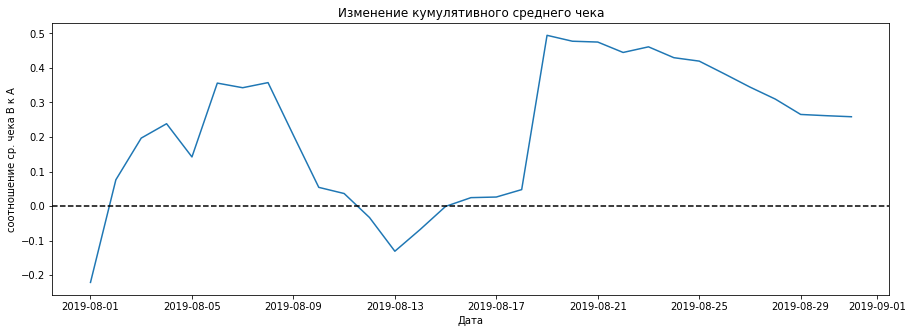

In [30]:
fig = plt.figure(figsize=(15,5))
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
plt.axhline(y=0, color='black', linestyle='--') 
plt.title('Изменение кумулятивного среднего чека')
plt.xlabel('Дата')
plt.ylabel('соотношение ср. чека B к A')
plt.show()

### Выводы по графику изменения кумулятивного среднего чека

1. В нескольких точках на графике видны резкие скачки как в сторону роста разницы, так и в сторону падения. 
Это подтверждает версию о том, что в наших данных есть покупки с очень высокими средними чеками.
2. Дополнительно отмечу, что высокие средние чеки есть в обоих группах, так как мы видим на графике, как 9 августа 2019 года соотношение среднего чека группы `B` к среднему чеку группы `A` снижается и опускается ниже `0`. В этот момент, предположу, в группе `A` были совершены крупные покупки. Либо в группе `B` делали аномально низкие по стоимости покупки. 

### График кумулятивной конверсии по группам

Теперь в нашем анализе рассмотрим график кумулятивной конверсии по группам.

Создадим дополнительную колонку в нашем датафрейме и отдельные переменные для группы `A` и `B`.

In [31]:
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']
cumulativeData.head()

,date,group,orders,buyers,revenue,visitors,conversion
0,2019-08-01,A,24,20,148579,719,0.033380
1,2019-08-01,B,21,20,101217,713,0.029453
2,2019-08-02,A,44,38,242401,1338,0.032885
3,2019-08-02,B,45,43,266748,1294,0.034776
4,2019-08-03,A,68,62,354874,1845,0.036856


Переменные: 

In [32]:
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

Графики: 

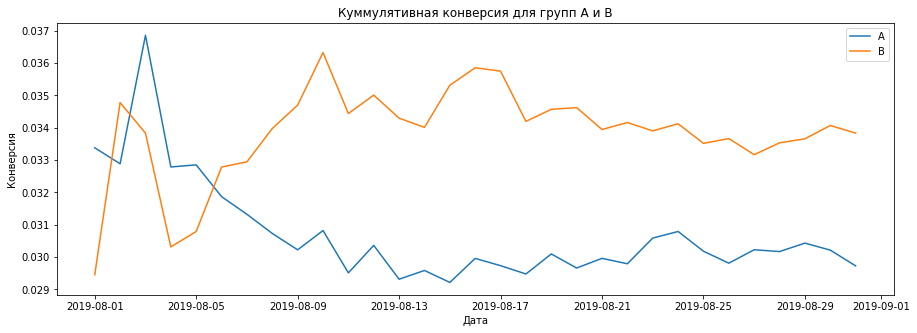

In [33]:
fig = plt.figure(figsize=(15,5))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.title('Куммулятивная конверсия для групп А и B')
plt.xlabel('Дата')
plt.ylabel('Конверсия')
plt.legend()
plt.show()

### Выводы по графику куммулятивной конверсии 

1. Видим, что в целом группа B конвертируется лучше группы A.
2. На графике отчетливо виден скачен конверсии в первые 2 дня для группы А и последующее резкое снижение. 
3. Для группы В резкий рост конверсии произошел 5 августа. 
4. Судя по графику, вероятно, можно сказать, что уровень колебаний у группы В сильно выше, чем у группы А.

### График относительного изменения кумулятивной конверсии группы B к группе A

Посмотрим также на изменение конверсии группы В к группе А.
1. Объединим данные двух групп в один датафрейм, чтобы было удобнее строить график. 
2. Построим сам график и проанализируем его.

In [34]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

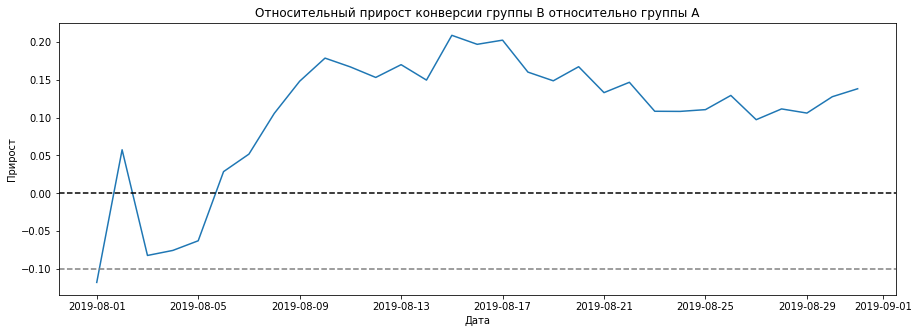

In [35]:
fig = plt.figure(figsize=(15,5))
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=-0.1, color='grey', linestyle='--')

plt.title('Относительный прирост конверсии группы B относительно группы A')
plt.xlabel('Дата')
plt.ylabel('Прирост')
plt.show()

### Вывод по графику относительного изменения кумулятивной конверсии


1. В начале теста группа B значительно проигрывала группе A, затем вырвалась вперёд.
2. Относительный прирост держится сильно выше 0 на протяжении почти всего рассматриваемого периода. 
3. Возможной причиной могут послужить выбросы (или аномально высокие чеки) в группе В. 

## Анализ аномально высоких значений в выборках

### Анализ аномалий по кол-ву заказов

Рассмотрим аномалии в наших данных, поскольку они могут крайне сильно повлиять на наши результаты. Возможно, придется отсечь часть данных. 

1. Для начала сделаю сводную таблицу, в которой будет отражено кол-во покупок на каждого пользователя. 
2. Построю гистрограмму распределения количества заказов на одного пользователя.
3. Построю точечную диаграмму числа заказов на одного пользователя.
4. Посчитаю 95 и 99 персентили в данных. 
5. Приму решение, стоит ли очищать данные от аномалий (и если да, то какие данные необходимо удалить).

In [36]:
ordersByUsers = (
    orders.groupby('visitor_id', as_index=False)
    .agg({'transaction_id': 'nunique'})
)

ordersByUsers.columns = ['visitor_id', 'orders']
ordersByUsers.sort_values(by='orders', ascending=False)

,visitor_id,orders
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5
...,...,...
359,1484903144,1
360,1485964287,1
361,1494664757,1
362,1495112755,1


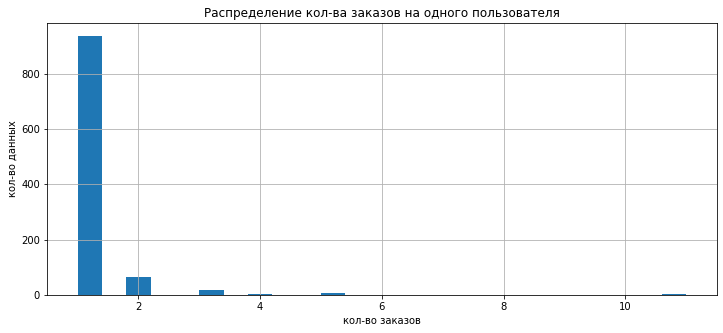

In [37]:
ordersByUsers['orders'].hist(bins=25, figsize=(12,5))
plt.title('Распределение кол-ва заказов на одного пользователя')
plt.xlabel('кол-во заказов')
plt.ylabel('кол-во данных')
plt.show()

**Промежуточный итог**

1. Подавляющее большинство кользователей сделали 1 заказ за рассматриваемый период.
2. Однако, доля пользователей с кол-вом заказов 2-4 достаточно значительна, ввиду чего их также стоит рассматирвать.

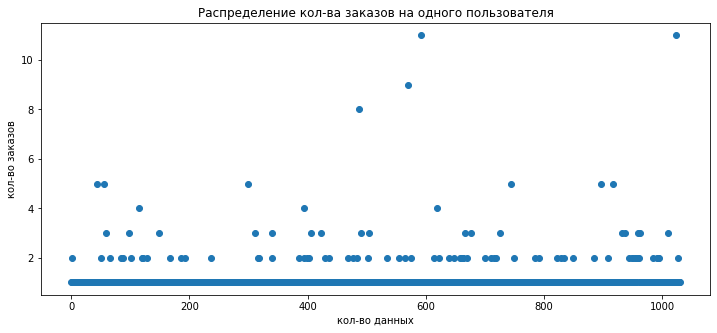

In [38]:
fig = plt.figure(figsize=(12,5))
x_values = pd.Series(range(0,len(ordersByUsers)))
plt.scatter(x_values, ordersByUsers['orders']) 
plt.title('Распределение кол-ва заказов на одного пользователя')
plt.xlabel('кол-во данных')
plt.ylabel('кол-во заказов')
plt.show()

**Промежуточный итог**

1. Подтверждается, что большая часть пользователей сделала 1 заказ за рассматриваемый период. 
2. На точечной диаграмме более отчетливо видно, что кол-во пользователей с 2-4 заказами достаточно велико. 
3. Однако, их точная доля непонятна. В этом нам поможет расчет 95 и 99 персентилей в разрезе кол-ва заказов. 

Посчитаем также 95-й и 99-й персентили.

In [39]:
print(np.percentile(ordersByUsers['orders'], [95, 99])) 

[2. 4.]


### Вывод по анализу аномалий в разрезе кол-ва заказов

Итак. Как видно выше, 99% пользователей не сделало больше 4 заказов за анализируемый период. При этом, 95% пользователей сделали всего 2 заказа. 

В качестве границы для определения аномальных значений я выберу значение в 4 заказа. Так, мы потеряем не очень большое кол-во пользователей, при этом сохраним качество данных. 

### Анализ аномалий по стоимости заказов

Проведем такой же анализ, только в разрезе стоимости заказов.

In [40]:
orders['revenue'].sort_values(ascending=False).head(10).unique()

array([1294500,  202740,   93940,   92550,   86620,   78990,   67990,
         66350,   65710])

Мы видим 2 очень больших заказа в наших данных: 1 294 500 и 202 740. Они потенциально могут очень сильно влиять на результаты нашего исследования. 

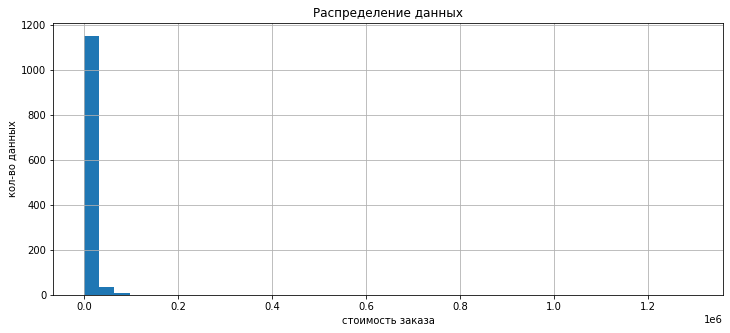

In [41]:
orders['revenue'].hist(bins=40, figsize=(12,5))
plt.title('Распределение данных')
plt.xlabel('стоимость заказа')
plt.ylabel('кол-во данных')
plt.show()

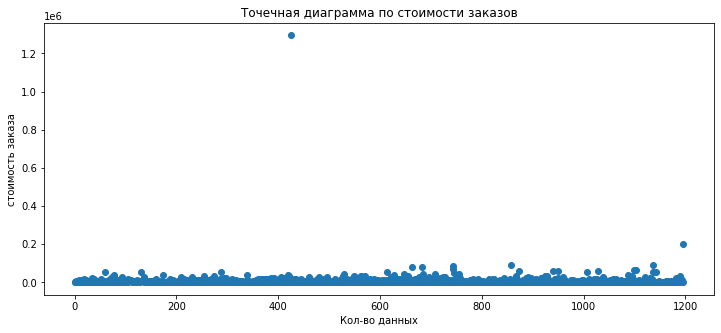

In [42]:
fig = plt.figure(figsize=(12,5))
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue']) 
plt.title('Точечная диаграмма по стоимости заказов')
plt.xlabel('Кол-во данных')
plt.ylabel('стоимость заказа')
plt.show()

Посчитаем также 95 и 99 персентили стоимости заказов

In [43]:
print(np.percentile(orders['revenue'],  [95, 99]))

[28000.  58233.2]


### Выводы по анализу аномалий по стоимости заказов

1. Не более 5% пользователей совершили покупку суммой свыше 28000.
2. Не более 1% пользователей совершили покупку суммой свыше 58233.2. 

В качестве границы для определения аномальных значений я выберу значение в 58233.2. Так, мы потеряем не очень большое кол-во пользователей, при этом сохраним качество данных. 

## Анализ статистической значимости данных по сырым данным 

### Подготовка данных

Необходимо подготовить наши данные для теста. Сделаем это в несколько этапов: 
1. Определим кол-во пользователей на определенную дату для обеих групп. Данные сохраню в переменные `visitorsPerDateA` и `visitorsPerDateB`.
2. Затем посчитаем кол-во пользователей до определенной даты. Другими словами, посчитаем кумулятивное значение пользователей на определенную дату. Это данные сохраню в переменные `visitorsCummulativeA` и `visitorsCummulativeB`.  
3. Определим также кол-во заказов на конкретную дату. Данные сохраню в переменные `ordersPerDateA` и `ordersPerDateB`.
4. Посчитаем также кумулятивные значения кол-ва заказов на определенную дату. Соответствующие переменные : `ordersCummulativeA ` и `ordersCummulativeB`.
5. Объединим все полученные датафреймы в один единый для того, чтобы было удобнее дальше с ними работать (фактически, с одним датафреймом вместо 8). 
6. Посчитаем статистическую значимость различий в конверсии между группам по "сырым" данным.

**Кол-во пользователей на определенную дату**

In [44]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

**Кол-во пользователей (кумулятивное значение) на определенную дату**

In [45]:
visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']


visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

**Кол-во заказов на определенную дату**

In [46]:
ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

**Кумулятивные значения кол-ва заказов на определенную дату**

In [47]:
ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA']


ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

**Объединение датафреймов**

Объединение проведем по столбцу с датой, так как все эти данные у нас рассматриваются за один и тот же период. 

In [48]:
data_merged = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

display(data_merged.head()) 

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280


Теперь посчитаем статистическую значимость. Посчитаем кол-во заказов для каждого пользователя в каждой группе. Информацию сохраню в переменные `ordersByUsersA` и `ordersByUsersB`. А также объявим 2 новые переменные `sampleA` и `sampleB`, в которых пользователям из разных групп будет соответствовать количество заказов. Напротив тех пользователей, которые ничего не заказали, я укажу 0.

In [49]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders'] 

Теперь зададим переменные `sampleA` и `sampleB`, в которые объединим все данные по каждой группе. 

In [50]:
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data_merged['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data_merged['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0) 

### Cтатистическая значимость различий в конверсии между группами по «сырым» данным

Теперь у нас все готово к проведению проверки критерием Манна-Уитни.
Проведем тест и, заодно, посчитаем, есть ли какой-то проигрыш или выигрыш в значениях у группы `B` перед группой `A`.

Посчитаем статистическую значимость различий в конверсии между группами по «сырым» данным. 

Для этого первоначально необходимо сформулировать нулевую и альтернативную гипотезы. 

`H₀ - конверсии между группами равны`. Другими словами, различий между конверсиями групп нет. 
`H₁ - конверсии между группами не равны`. Другими словами, различия между конверсиями групп присутствуют.  

In [51]:
print('p-value:', "{0:.4f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print('Относительный выигрыш группы B:',"{0:.1f}%".format((sampleB.mean() / sampleA.mean() - 1)*100))

p-value: 0.0168
Относительный выигрыш группы B: 13.8%


### Вывод по тесту по критерию Манна-Уитни

1. Мы видим, что полученное значение p-value сильно меньше нашей alpha - 0.05. Это говорит о том, что нулевую гипотезу о том, что статистически значимых различий в конверсии между группами нет, отвергаем. 
2. Относительный выигрыш группы B перед группой A равен 13,8%. 

### Cтатистическая значимость различий в среднем чеке заказа между группами по «сырым» данным

Проведем аналогичный тест и по различиям в среднем чеке заказа между группами. 
Наши гипотезы следующие: 
`H₀ - Различий в среднем чеке между группами нет`.
`H₁ - различия в среднем чеке между группами есть`.  

Все данные у нас уже подготовлены для теста. Передадим критерию `mannwhitneyu()` данные о выручке и проведем тест. 

In [52]:
print('p-value:''{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('Относительный выигрыш группы B:', '{0:.1f}%'.format((orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)*100)) 

p-value:0.729
Относительный выигрыш группы B: 25.9%


### Вывод по тесту по критерию Манна-Уитни

1. Первое число, полученное в результате теста, сильно выше установленного нами alpha - 0.05. Это говорит о том, что причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет.
2. При этом, мы видим, что средний чек у группы В выше на почти 26%. Предположу, что такая ситуация возникла из-за того, что в группу B попал тот покупатель, который совершил покупки суммой свыше 1 млн рублей. 

Собственно, чтобы получить чуть более реалистичную картину, стоит провести тест по очищенным данным. 

## Статистическая значимость по очищенным данным

Чуть ранее я установил следующие критерии, по которым буду очищать данные от аномалий: 

    1. В качестве границы для определения аномальных значений по кол-ву заказов я выберу значение в 4 заказа. 
    2. В качестве границы для определения аномальных значений по стоимости заказа я выберу значение в 58233.2.

Я сначала посмотрю, сколько всего "аномальных" пользователей у нас в данных, а после отсеку их из выборок. 

**Кол-во аномальных пользователей по кол-ву заказов**

In [53]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 4]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > 4]['userId'],
    ],
    axis=0,
)
print('Кол-во аномальных пользователей без привязки ко второму критерию:', usersWithManyOrders.shape)

Кол-во аномальных пользователей без привязки ко второму критерию: (5,)


Таких аномалий (без привязки ко второму критерию) всего 5. 

**Кол-во аномальных пользователей по сумме заказа**

In [54]:
usersWithExpensiveOrders = orders[orders['revenue'] > 58233.2]['visitor_id']
print('Кол-во аномальных пользователей без привязки к первому критерию:', usersWithExpensiveOrders.shape)

Кол-во аномальных пользователей без привязки к первому критерию: (12,)


Таких аномалий (без привязки к первому критерию) всего 12. 

Объединю эти данные в один датафрейм, чтобы исключить дублирующие строки, и чтобы дальше было проще исключить их из общего датафрейма.

In [55]:
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print('Кол-во аномальных пользователей', abnormalUsers.shape)

Кол-во аномальных пользователей (15,)


Итак, у нас всего 15 аномалий, превышающих установленные ранее пороговые значения. Почистим наши данные с помощью `np.logical_not` для обеих групп и проведем повторно тест. 

**Для группы `A`**

In [56]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data_merged['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

**Для группы `B`**

In [57]:
sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data_merged['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 

### Cтатистическая значимость различий в конверсии между группами по «очищенным» данным

Наши гипотезы те же, что и раньше.

`H₀ - конверсии между группами равны`. Другими словами, различий между конверсиями групп нет. 
`H₁ - конверсии между группами не равны`. Другими словами, различия между конверсиями групп присутствуют.  

Применим статистический критерий Манна-Уитни к полученным выборкам.

In [58]:
print('p-value', '{0:.4f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('Относительный выигрыш группы B','{0:.1f}%'.format((sampleBFiltered.mean()/sampleAFiltered.mean()-1)*100)) 

p-value 0.0144
Относительный выигрыш группы B 15.3%


**Промежуточный итог**

Результаты теста на статистическую значимость различий в конверсии между группами по "очищенным" данным практически не изменились.

P-value все также ниже нашей alpha, что не дает оснований нам не отвергать нулевую гипотезу. Одновременно, относительный выигрыш увеличился до 15.33%. 

### Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным

То же самое сделаем и в разрезе средних чеков групп `A` и `B`. 

`H₀ - Различий в среднем чеке между группами нет`.
`H₁ - различия в среднем чеке между группами есть`.  

In [59]:
print('p-value:',
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print('Относительный проигрыщ группы B:',
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
) 

p-value: 0.851
Относительный проигрыщ группы B: -0.006


**Промежуточный вывод**

1. Первое число (p-value) по-прежнему сильно выше нашего alpha - 0.05, что говорит нам о том, что мы не отвергаем нашу нулевую гипотезу. 
2. Разница между сегментами сократилась очень сильно с 26% до небольшого отрицательного значения. Это, собственно, хорошо показывает влияние аномально высоких значений и подтверждает мое предположение, что покупатель с общей сумму покупки выше 1 млн рублей попал в группу B. 

## Выводы по проекту

1. Есть статистически значимое различие по конверсии между группами как по «сырым», так и по данным после фильтрации аномалий.
2. По «сырым» данным нет статистически значимого различия по среднему чеку между группами. По очищенным также не наблюдается наличие статистически значимого различия по среднему чеку. 
3. Основываясь на графике относительного прироста конверсии группы B по отношению к группе А, можно сказать, что различия между конверсиями есть. Более того, конверсия группы В лучше конверсии группы А. 
4. График относительного изменения отношения среднего чека группы В к среднему чеку группы А колеблется во времени. Однако, по нему видно, что за исключением нескольких дней, средний чек группы В сильно выше среднего чека группы А. 

Основываясь на этом, тест можно признать успешным. Его стоит остановить, а внесенные изменения экстраполировать на более широкую аудиторию.